# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [93]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | rancho palos verdes
Processing Record 11 of Set 1 | kasongo
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | ziro
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | puerto madryn
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | kushiro
Processing Record 20 of Set 1 | nikshahr
City not found. Skipping...
Processing Record 21 of Set 1 | st. john's


In [94]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)


# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [95]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,87,0,2.00,RU,1690221979
1,yellowknife,62.4560,-114.3525,21.29,52,100,3.09,CA,1690221694
2,tura,25.5198,90.2201,24.65,90,100,1.83,IN,1690221861
3,keflavik,64.0049,-22.5624,13.95,87,100,3.60,IS,1690221985
4,edinburgh of the seven seas,-37.0676,-12.3116,14.63,81,70,15.81,SH,1690221982


In [96]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [97]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,87,0,2.00,RU,1690221979
1,yellowknife,62.4560,-114.3525,21.29,52,100,3.09,CA,1690221694
2,tura,25.5198,90.2201,24.65,90,100,1.83,IN,1690221861
3,keflavik,64.0049,-22.5624,13.95,87,100,3.60,IS,1690221985
4,edinburgh of the seven seas,-37.0676,-12.3116,14.63,81,70,15.81,SH,1690221982


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

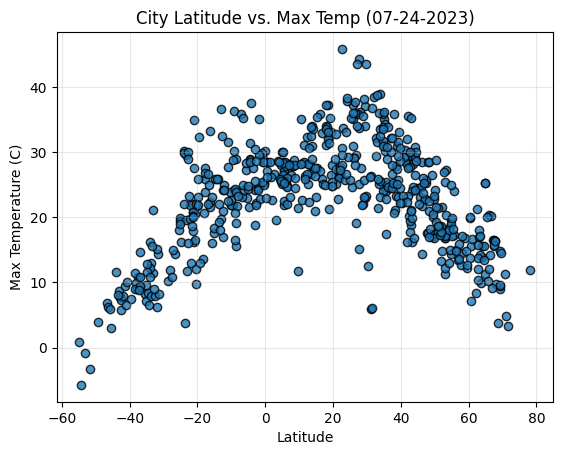

In [98]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(alpha=0.30)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

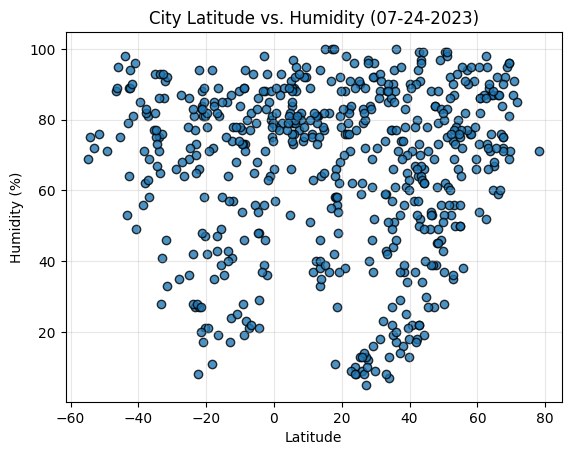

In [99]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.30)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

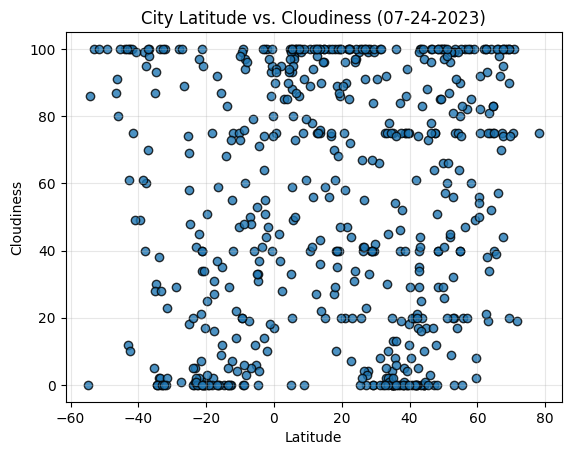

In [100]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=0.30)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

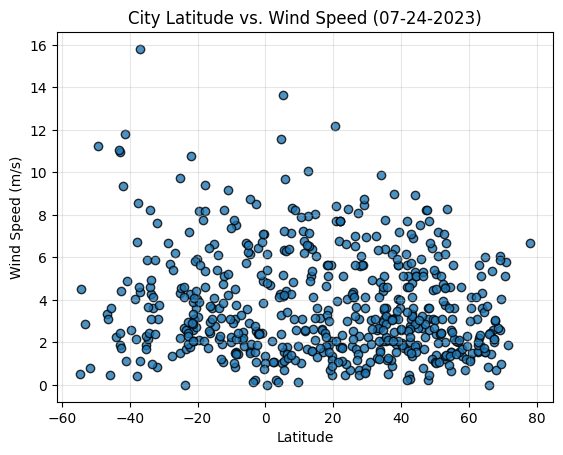

In [101]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha=0.30)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regress_values = x_val * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,87,0,2.00,RU,1690221979
1,yellowknife,62.4560,-114.3525,21.29,52,100,3.09,CA,1690221694
2,tura,25.5198,90.2201,24.65,90,100,1.83,IN,1690221861
3,keflavik,64.0049,-22.5624,13.95,87,100,3.60,IS,1690221985
5,anadyr,64.7500,177.4833,11.28,87,75,6.00,RU,1690221990


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,edinburgh of the seven seas,-37.0676,-12.3116,14.63,81,70,15.81,SH,1690221982
7,ushuaia,-54.8000,-68.3000,0.81,69,0,0.51,AR,1690221980
8,margaret river,-33.9500,115.0667,16.23,75,2,8.21,AU,1690221882
10,kasongo,-4.4500,26.6667,28.96,29,37,1.60,CD,1690222092
13,grytviken,-54.2811,-36.5092,-5.71,75,86,4.51,GS,1690221982


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.592785550001325


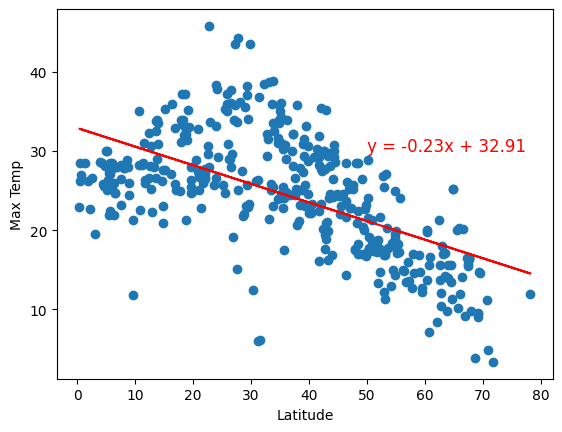

In [117]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(50,30),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.8213469632596423


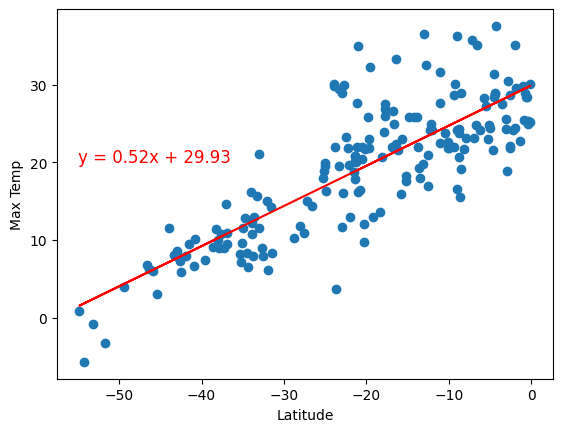

In [121]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** For the northen hemisphere regression there seems to be a negative realtionship between temperature and latitude. As the latitude increases and distance from the equator decreases, the max temperature decreases. The southern hemisphere regression shows a slightly positive realtionship between temperature and latitude. As the latitude decreases and the distance from the equator grows, the max temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.019188761111479425


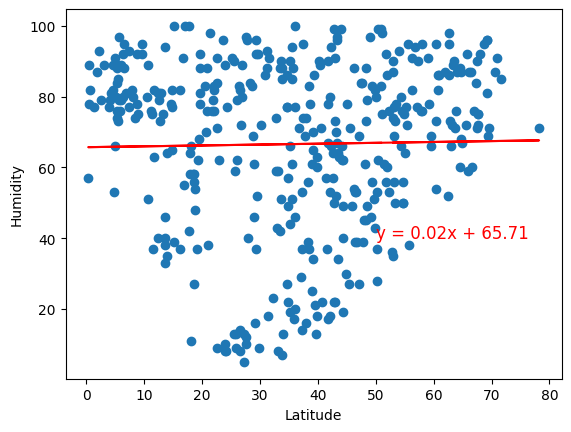

In [125]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(50,40),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')


The r-value is -0.17189856760630978


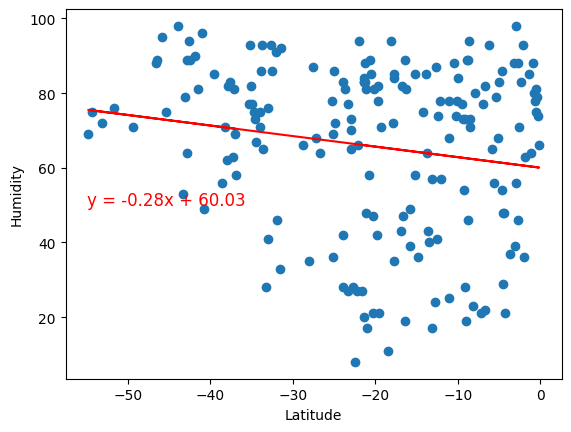

In [126]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There doesn't appear to be a correlation between the latitude and wind speed for the northen and southern hemisphere plots.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.08242814032611412


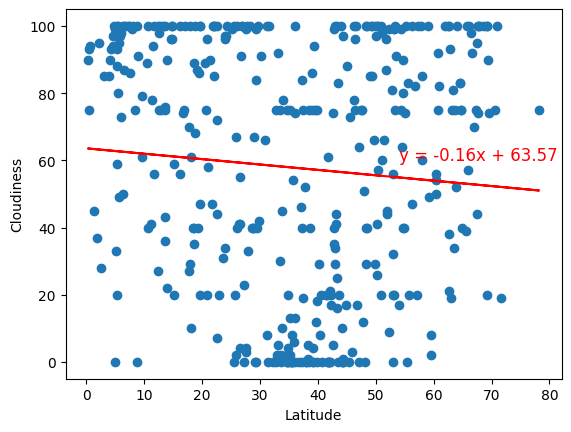

In [130]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(54,60),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is -0.14131569729166446


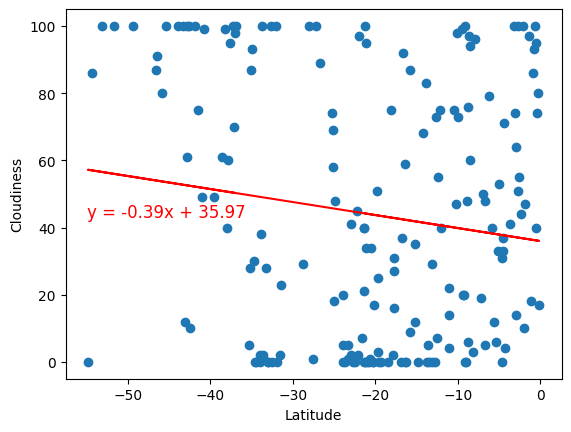

In [132]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(-55,43),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There doesn't appear to be a correlation between the latitude and wind speed for the northen and southern hemisphere plots.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.1446886776978744


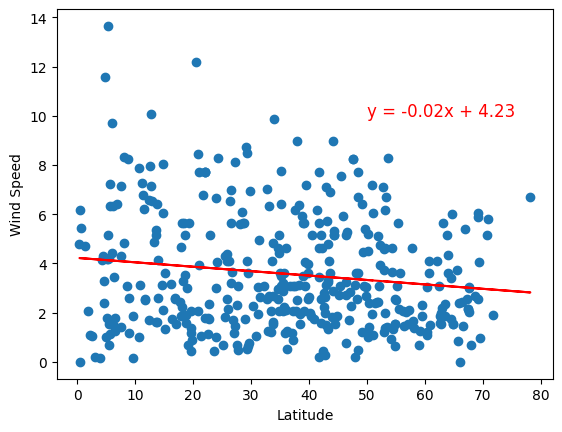

In [133]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.10283656103377112


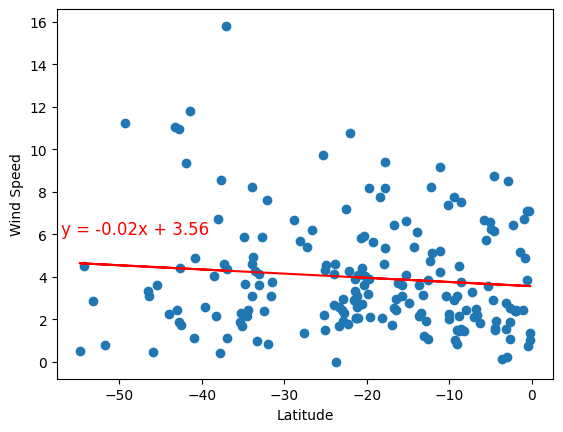

In [141]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Annotation
plt.annotate(line_eq,(-57,6),fontsize=12,color="red")

# Incorporate the other graph properties
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There doesn't appear to be a correlation between the latitude and wind speed for the northen and southern hemisphere plots.